# Gurobi example

This notebook demonstrates how to use `OptiWindNet` to design collector system cable layouts using the **MILPRouter with Gurobi solver**.

## Load data

import required modules

In [ ]:
from optiwindnet.api import WindFarmNetwork, EWRouter, MILPRouter

In [3]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

create an instance of `wfn` using `.from_pbf()`


In [4]:
wfn = WindFarmNetwork.from_pbf(filepath='data/DTU_letters.osm.pbf', cables=7)

<Axes: >

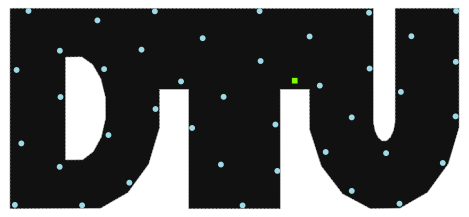

In [5]:
wfn.plot_location()

## Optimize

Warmstart with `EWRouter`:

In [6]:
res_warmstart= wfn.optimize(router=EWRouter())

In [7]:
wfn.length()

1820.1681190424422

In [8]:
milp_router = MILPRouter(solver_name='gurobi', time_limit=60, mip_gap=0.005, verbose=True)
res = wfn.optimize(router=milp_router)

Using warm start: the model is initialized with the provided solution S.

Set parameter OutputFlag to value 1
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 11th Gen Intel(R) Core(TM) i5-1145G7 @ 2.60GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
TimeLimit  60
MIPGap  0.005
MIPFocus  1

Academic license 2690479 - for non-commercial use only - registered to am___@dtu.dk
Optimize a model with 1093 rows, 708 columns and 3962 nonzeros
Model fingerprint: 0xd6e844c9
Variable types: 0 continuous, 708 integer (354 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+00]
  Objective range  [2e+01, 2e+02]
  Bounds range     [1e+00, 7e+00]
  RHS range        [1e+00, 4e+01]

Loaded user MIP start with objective 1636.56

Presolve removed 121 rows and 0 columns
Presolve time: 0.02s
Presolved: 972 rows, 708 columns, 3368 nonzeros
Variable types: 0 c

In [9]:
wfn.solution_info()

SolutionInfo(runtime=2.3350000381469727, bound=1575.3554359240072, objective=1575.3554359240072, relgap=0.0, termination='optimal')

In [10]:
wfn.length()

1575.355435924007

<Axes: >

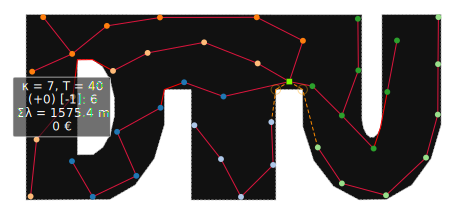

In [11]:
wfn.plot()